In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
import numpy as np

In [23]:
file_path = 'gaussiannaivebayes.csv'
data = pd.read_csv(file_path)
data.head()

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,650,6.50,0.01,0.00,0.01,-87,Air_All
1,240,2.40,0.01,0.00,0.00,-156,Air_All
2,6,405.06,67.51,0.25,0.65,0,Ground_Sea
3,600,870.00,1.45,0.01,1.39,0,Ground_Sea
4,5498,54.98,0.01,0.00,0.09,-65,Air_All


In [24]:
label_encoder = LabelEncoder()
data['Shipment Mode'] = label_encoder.fit_transform(data['Shipment Mode'])
data.head()

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,650,6.50,0.01,0.00,0.01,-87,0
1,240,2.40,0.01,0.00,0.00,-156,0
2,6,405.06,67.51,0.25,0.65,0,1
3,600,870.00,1.45,0.01,1.39,0,1
4,5498,54.98,0.01,0.00,0.09,-65,0


In [25]:
numerical_columns = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 
                     'LineItemInsurance', 'Delay']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay,Shipment Mode
0,-0.543846,-0.587119,-0.804978,-0.708298,-0.578465,-1.030158,0
1,-0.561222,-0.587145,-0.804978,-0.708298,-0.578504,-1.915960,0
2,-0.571139,-0.584669,2.512826,-0.157092,-0.575994,0.086722,1
3,-0.545965,-0.581811,-0.734198,-0.686250,-0.573136,0.086722,1
4,-0.338388,-0.586821,-0.804978,-0.708298,-0.578156,-0.747729,0


In [26]:

X = data.drop(columns='Shipment Mode') 
y = data['Shipment Mode']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.6712962962962963

In [27]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Total data size: {len(X)}")

Training set size: 5181
Testing set size: 1296
Total data size: 6477


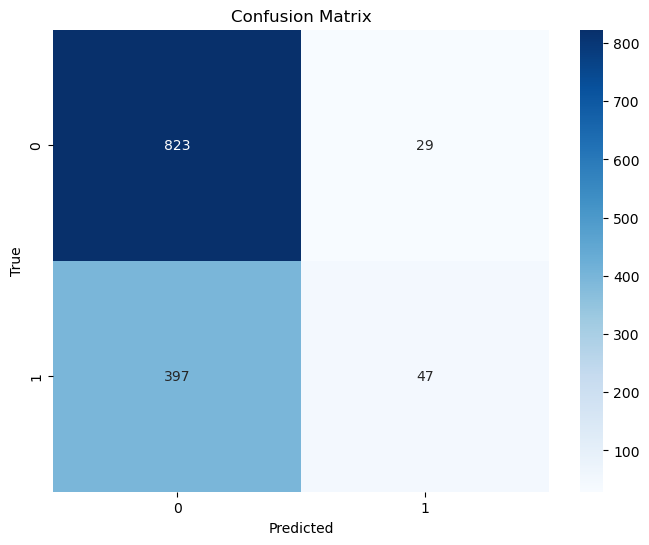

In [28]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Kernel: linear, C: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       852
           1       0.62      0.10      0.17       444

    accuracy                           0.67      1296
   macro avg       0.65      0.53      0.48      1296
weighted avg       0.65      0.67      0.58      1296



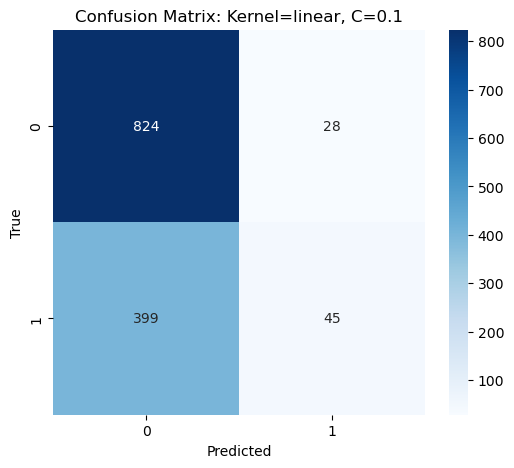

Accuracy for Kernel=linear, C=0.1: 0.6705246913580247

Kernel: linear, C: 1
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       852
           1       0.62      0.11      0.18       444

    accuracy                           0.67      1296
   macro avg       0.65      0.54      0.49      1296
weighted avg       0.66      0.67      0.58      1296



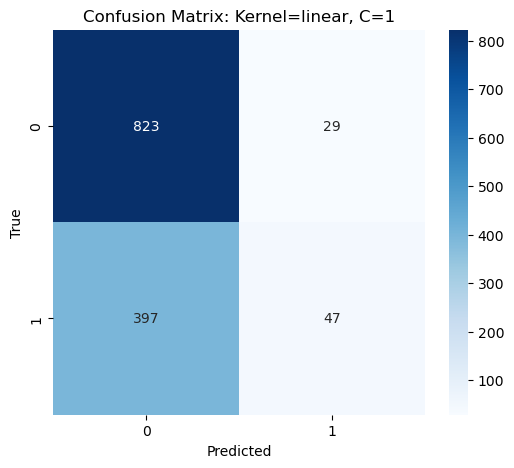

Accuracy for Kernel=linear, C=1: 0.6712962962962963

Kernel: linear, C: 10
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       852
           1       0.62      0.11      0.18       444

    accuracy                           0.67      1296
   macro avg       0.65      0.54      0.49      1296
weighted avg       0.66      0.67      0.58      1296



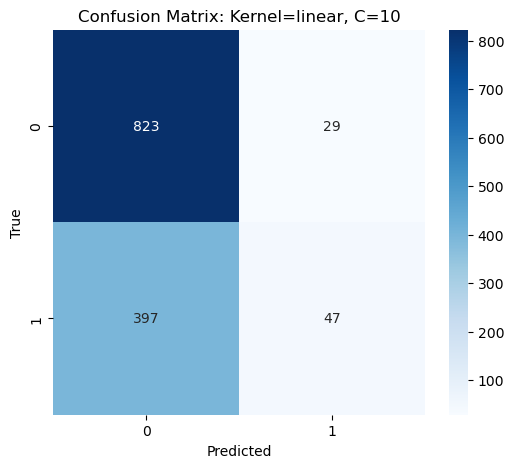

Accuracy for Kernel=linear, C=10: 0.6712962962962963

Kernel: poly, C: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       852
           1       0.75      0.06      0.11       444

    accuracy                           0.67      1296
   macro avg       0.71      0.53      0.46      1296
weighted avg       0.70      0.67      0.56      1296



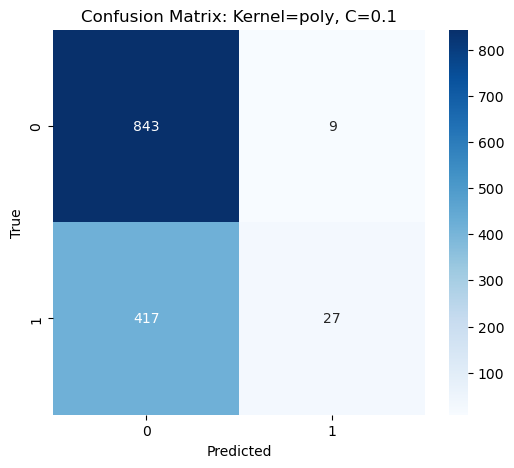

Accuracy for Kernel=poly, C=0.1: 0.6712962962962963

Kernel: poly, C: 1
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       852
           1       0.73      0.07      0.13       444

    accuracy                           0.67      1296
   macro avg       0.70      0.53      0.46      1296
weighted avg       0.69      0.67      0.57      1296



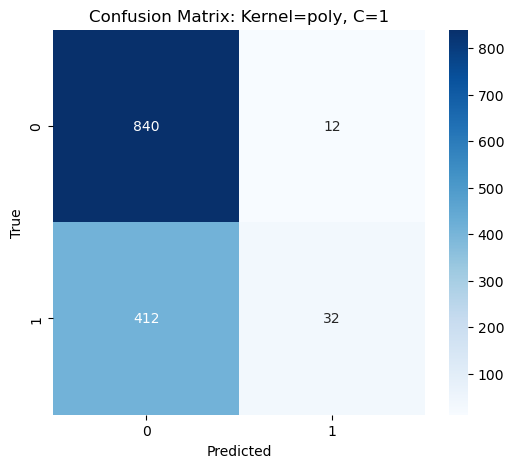

Accuracy for Kernel=poly, C=1: 0.6728395061728395

Kernel: poly, C: 10
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       852
           1       0.69      0.10      0.18       444

    accuracy                           0.68      1296
   macro avg       0.68      0.54      0.49      1296
weighted avg       0.68      0.68      0.59      1296



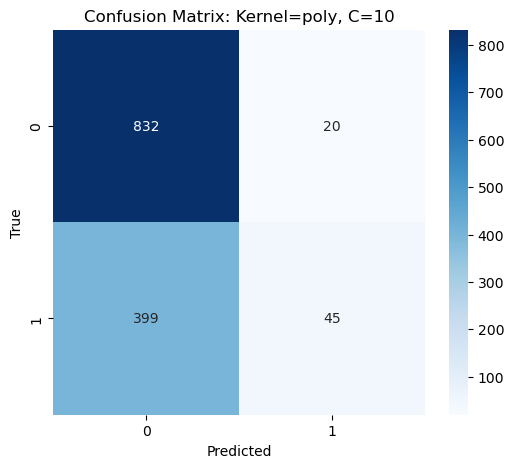

Accuracy for Kernel=poly, C=10: 0.6766975308641975

Kernel: rbf, C: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.98      0.80       852
           1       0.74      0.11      0.20       444

    accuracy                           0.68      1296
   macro avg       0.71      0.55      0.50      1296
weighted avg       0.70      0.68      0.59      1296



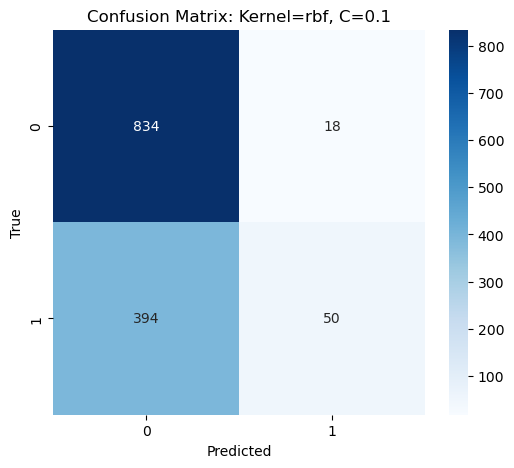

Accuracy for Kernel=rbf, C=0.1: 0.6820987654320988

Kernel: rbf, C: 1
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81       852
           1       0.72      0.29      0.41       444

    accuracy                           0.72      1296
   macro avg       0.72      0.61      0.61      1296
weighted avg       0.72      0.72      0.68      1296



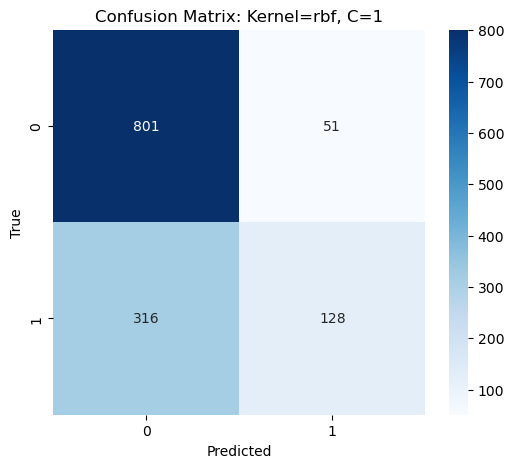

Accuracy for Kernel=rbf, C=1: 0.716820987654321

Kernel: rbf, C: 10
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       852
           1       0.73      0.34      0.47       444

    accuracy                           0.73      1296
   macro avg       0.73      0.64      0.64      1296
weighted avg       0.73      0.73      0.70      1296



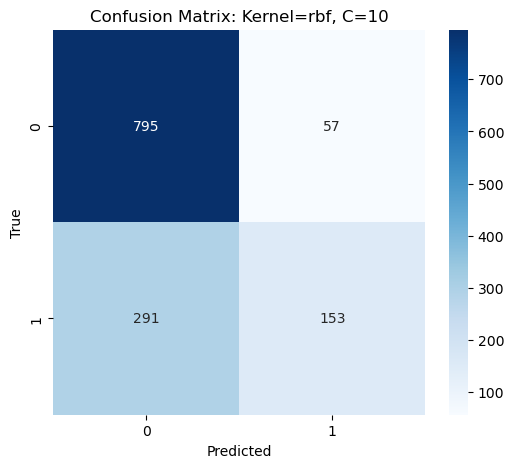

Accuracy for Kernel=rbf, C=10: 0.7314814814814815



In [30]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

def train_and_evaluate_svm(kernel, C_value):
    svm_model = SVC(kernel=kernel, C=C_value)
    svm_model.fit(X_train, y_train)
    
    y_pred = svm_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, C: {C_value}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f"Confusion Matrix: Kernel={kernel}, C={C_value}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    return accuracy
for kernel in kernels:
    for C_value in C_values:
        accuracy = train_and_evaluate_svm(kernel, C_value)
        print(f"Accuracy for Kernel={kernel}, C={C_value}: {accuracy}\n")

In [31]:
print("\nSample of training data:")
display(y_train.head())

print("\nSample of testing data:")
display(y_test.head())


Sample of training data:


2981    0
6044    0
293     1
6340    0
445     1
Name: Shipment Mode, dtype: int64


Sample of testing data:


2095    0
2415    0
3045    1
351     1
5495    0
Name: Shipment Mode, dtype: int64

In [32]:
print("\nSample of training data:")
display(X_train.head())

print("\nSample of testing data:")
display(X_test.head())


Sample of training data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
2981,2.313496,3.430516,-0.333604,-0.002754,2.015754,-0.888944
6044,-0.566265,-0.531366,2.880980,0.658694,-0.529383,0.086722
293,-0.570121,-0.575045,2.422877,-0.179140,-0.563597,-0.221383
6340,-0.570333,-0.587158,-0.804978,-0.708298,-0.578504,0.086722
445,-0.566350,-0.584733,-0.642282,-0.465767,-0.576611,0.086722



Sample of testing data:


,Line Item Quantity,Line Item Value,Pack Price,Unit Price,LineItemInsurance,Delay
2095,-0.564273,-0.585796,-0.740588,-0.664201,-0.577075,-0.182869
2415,-0.570884,-0.579783,4.109304,1.496527,-0.569429,0.086722
3045,0.276206,0.553913,-0.349333,-0.620105,0.604106,0.086722
351,-0.570249,-0.582592,0.546720,-0.201188,-0.575569,0.086722
5495,-0.555373,-0.380328,3.569117,1.253996,-0.364140,2.333322


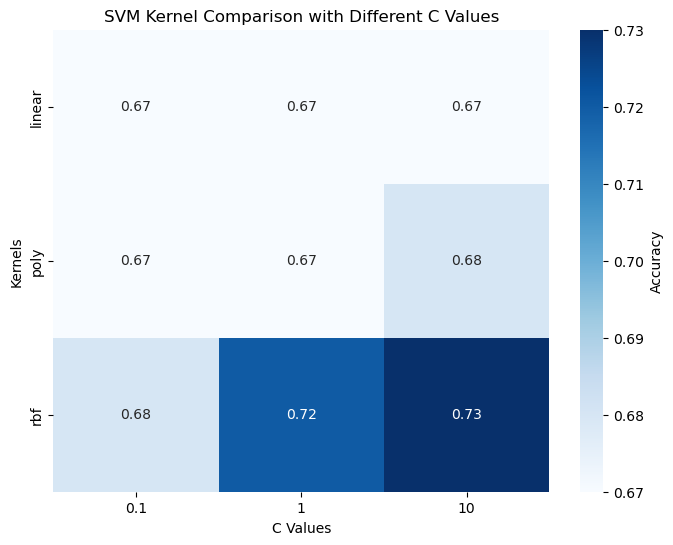

In [10]:
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]
accuracy_values = [
    [0.67, 0.67, 0.67],  # Linear kernel
    [0.67, 0.67, 0.68],  # Polynomial kernel
    [0.68, 0.72, 0.73]   # RBF kernel
]

accuracy_values = np.array(accuracy_values)

plt.figure(figsize=(8, 6))
sns.heatmap(accuracy_values, annot=True, cmap='Blues', xticklabels=C_values, yticklabels=kernels, cbar_kws={'label': 'Accuracy'})
plt.title("SVM Kernel Comparison with Different C Values")
plt.xlabel("C Values")
plt.ylabel("Kernels")
plt.show()


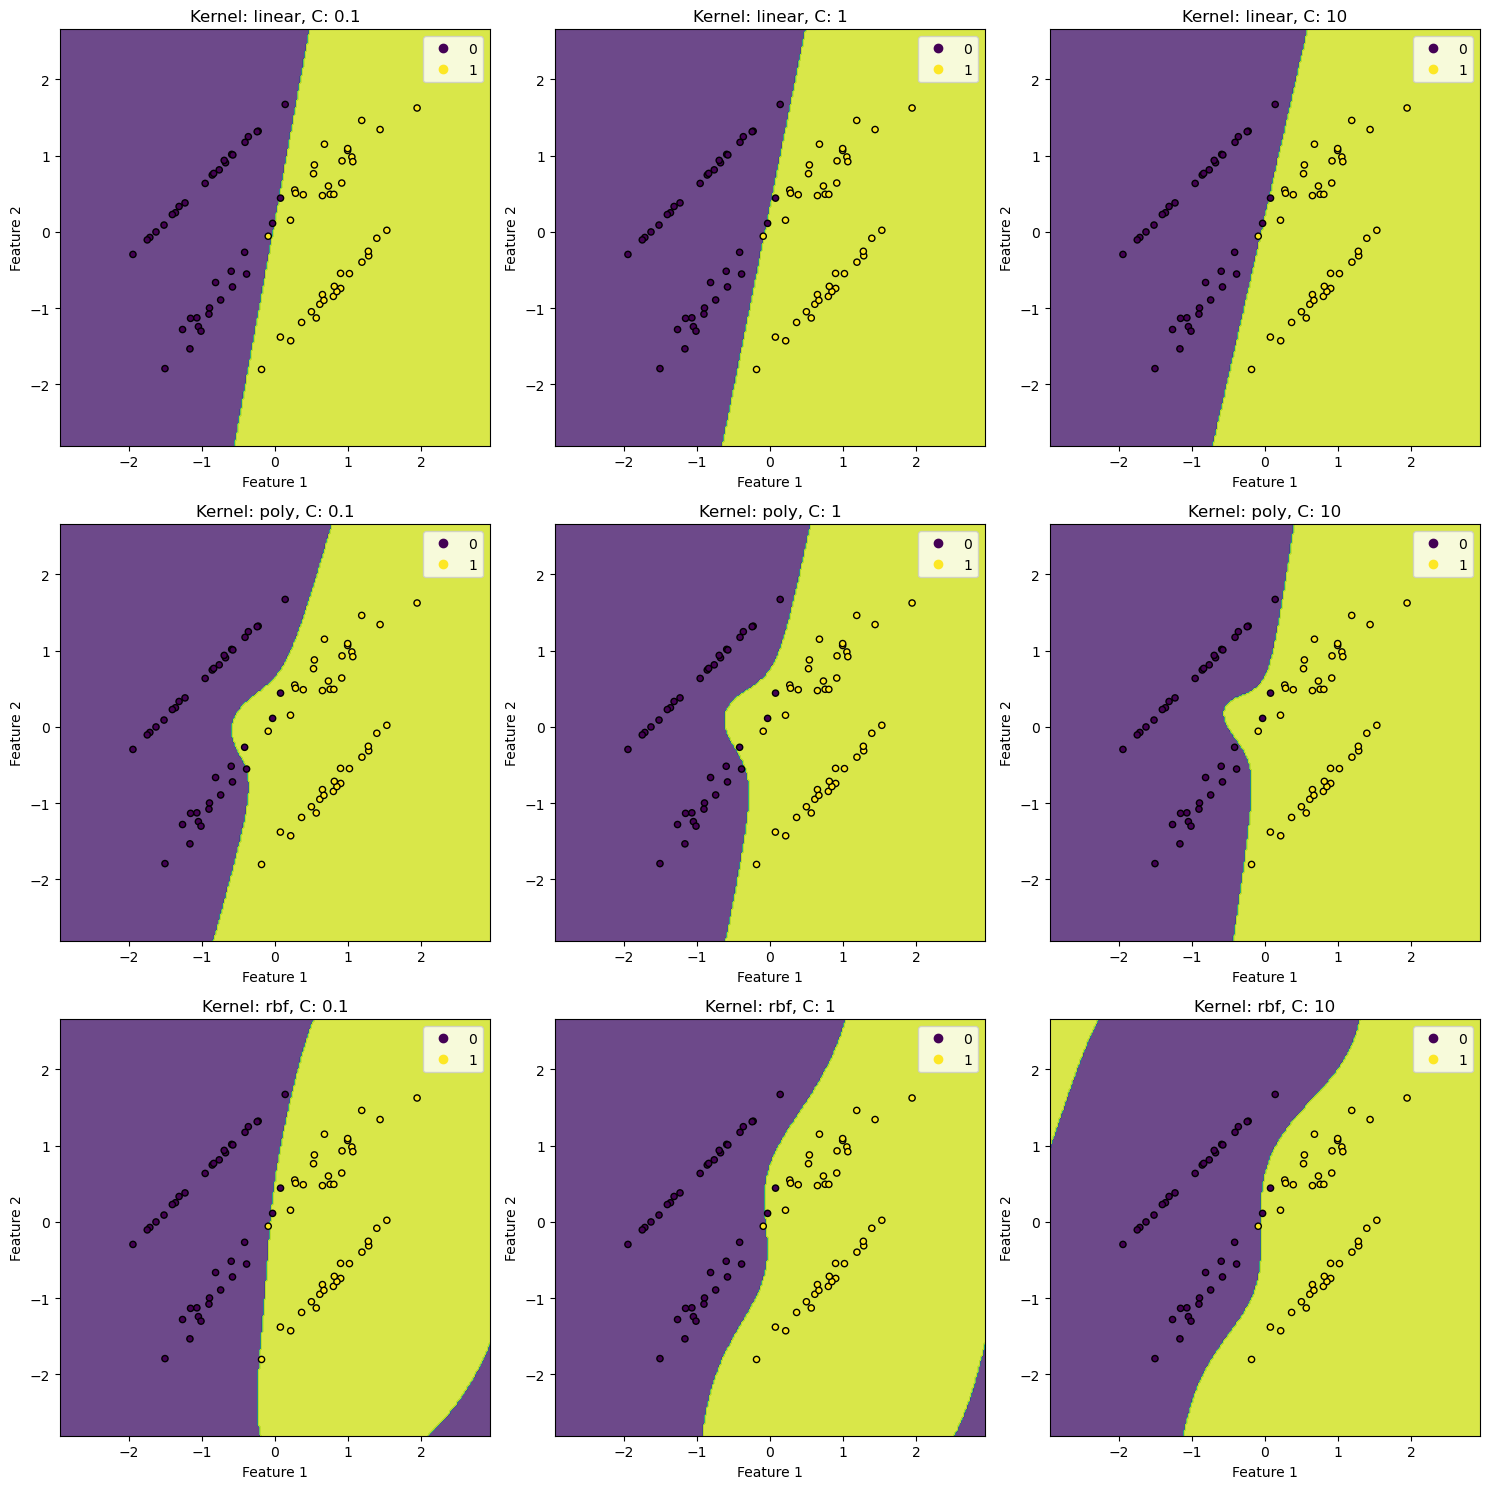

In [18]:

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def plot_decision_boundary(X, y, model, ax, title):
   
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=20)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend(*scatter.legend_elements(), loc="upper right")
kernels = ['linear', 'poly', 'rbf']
C_values = [0.1, 1, 10]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()

index = 0
for kernel in kernels:
    for C_value in C_values:
        # Initialize and train the SVM model
        svm_model = SVC(kernel=kernel, C=C_value)
        svm_model.fit(X_train, y_train)

        # Plot decision boundary
        plot_decision_boundary(X_train, y_train, svm_model, axes[index], 
                               f"Kernel: {kernel}, C: {C_value}")

        index += 1

plt.tight_layout()
plt.show(